In [8]:
#imports for image reading
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img


#imports for video and camera
import cv2
import tensorflow as tf

#extra imports
import time
import uuid
import os
import json

## Capturing Raw Data  

In [2]:
CURRENT_PATH = os.getcwd()

IMAGE_PATH = os.path.join(os.getcwd(), 'data', 'images')
LABEL_PATH = os.path.join(os.getcwd(), 'data', 'labels')

IMAGE_PATH

'E:\\Github\\Deep-Learning\\VideoTagger[WIP]\\data\\images'

In [5]:
### capturing images through the cameras
cap = cv2.VideoCapture(0)
total_images = 30

os.chdir(IMAGE_PATH)

for i in range(total_images):
    print(f"Collecting Image number: {i}")
    ret, frame = cap.read()
    image_name = f"{str(uuid.uuid1())}.jpg"
    cv2.imwrite(image_name, frame)
    cv2.imshow("image_frame", frame)
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Labelling the Image 

In [6]:
!labelme

## Augmenting the Labelled Dataset 

In [63]:
#bringing the dataset
DATA_PATH = IMAGE_PATH+"\\*.jpg"
data = tf.data.Dataset.list_files(DATA_PATH, shuffle=True)

In [64]:
#to check if the dataset read worked - file path to an images should come as output
data.as_numpy_iterator().next()

b'E:\\Github\\Deep-Learning\\VideoTagger[WIP]\\data\\images\\ea3d2a9b-2f03-11ee-87ae-d8bbc1768911.jpg'

In [65]:
#function to get images from the files read
def load_images(path):
    img = tf.io.read_file(path)
    img = tf.io.decode_jpeg(img)
    return img

In [66]:
#map the function to the data path to get all the images

images = data.map(load_images)

# images.as_numpy_iterator().next()

In [69]:
#Visualising the images

batch_image = images.batch(batch_size=4).as_numpy_iterator()
plot_img = batch_image.next()

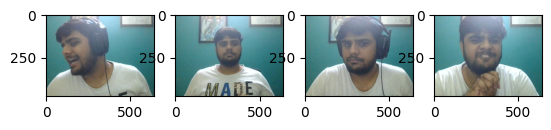

In [70]:
fig, ax = plt.subplots(ncols=4)
for index, image in enumerate(plot_img):
    ax[index].imshow(image)
plt.show()

In [71]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [72]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)